## Combined Cycle Power Plant[Predicting the Energy output]

In [1]:
#Standard Libary for data analysis.
import pandas as pd
import numpy as np


In [2]:
# suppressing warning that might arise.

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data for analysis.

df=pd.read_csv("D:/Python/CCPP Data/CCPP.csv") 

In [4]:
#Checking the data
df

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [5]:
#Now, checking for null values in every col. of the dataset

df.isnull().sum()

temperature          0
exhaust_vacuum       0
ambient_pressure     0
relative_humidity    0
energy_output        0
dtype: int64

In [6]:
# droping the duplicate values if any.

df=df.drop_duplicates()

In [7]:
#Again checking the shape of the data.

df.shape

(9527, 5)

#### As there are no null values and duplicates have been dropped from the dataset we can now proceed with EDA process

# EDA

In [8]:
#Checking for relationship b/w the dependent and independent variable

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Finding out the correlation 

cor=df.corr()

In [10]:
cor

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
ambient_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
relative_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_output,-0.947908,-0.869900,0.518687,0.391175,1.000000


<AxesSubplot:>

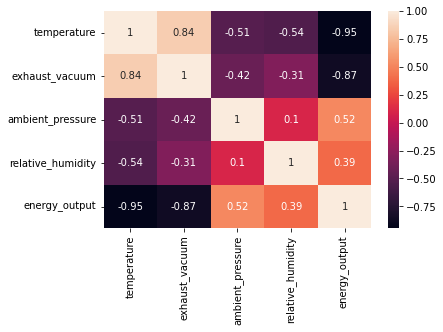

In [11]:
sns.heatmap(cor,annot=True)

 1.Energy output has a strong negative correlation with 'Temperature' and 'Exhaust Vacuum' of the Plant. So, it seems that as Temperature or Vacuum increases the Energy output of the Plant decreases.
 
 2.Similarly, Energy output has a positive correlation with Pressure and Humidity. It seems that on increasing Humidity and Pressure, the Power output will increase.
 
 3.Vacuum has a strong positive correlation with Temperature of the plant and also Humidity has a small positive correlation with Pressure.
 
 4.All the other non Power linkages have a negative correlation.

###### Making the list of columns present in the dataset for drawing comparison using histogram

In [12]:
l1=df.columns.tolist()

In [13]:
l1

['temperature',
 'exhaust_vacuum',
 'ambient_pressure',
 'relative_humidity',
 'energy_output']

count    9527.000000
mean       19.658225
std         7.444397
min         1.810000
25%        13.530000
50%        20.350000
75%        25.710000
max        37.110000
Name: temperature, dtype: float64


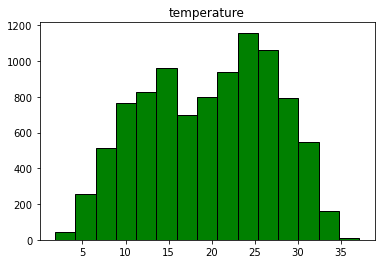

count    9527.000000
mean       54.293421
std        12.686309
min        25.360000
25%        41.740000
50%        52.080000
75%        66.510000
max        81.560000
Name: exhaust_vacuum, dtype: float64


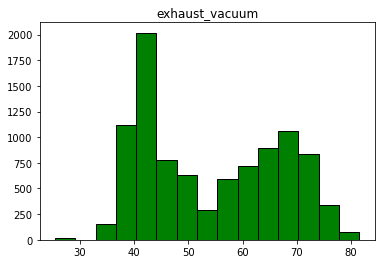

count    9527.000000
mean     1013.237084
std         5.940526
min       992.890000
25%      1009.085000
50%      1012.920000
75%      1017.200000
max      1033.300000
Name: ambient_pressure, dtype: float64


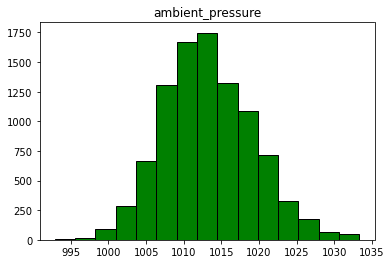

count    9527.000000
mean       73.334951
std        14.607513
min        25.560000
25%        63.375000
50%        75.000000
75%        84.850000
max       100.160000
Name: relative_humidity, dtype: float64


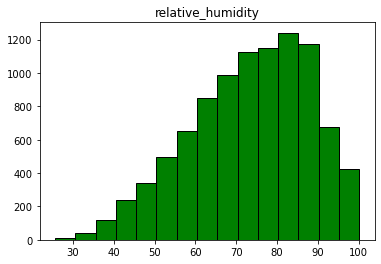

count    9527.00000
mean      454.33591
std        17.03908
min       420.26000
25%       439.75000
50%       451.52000
75%       468.36500
max       495.76000
Name: energy_output, dtype: float64


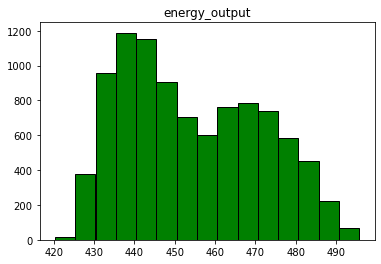

In [14]:
for i in l1:
    print(df[i].describe())
    plt.figsize=8,6
    plt.hist(x=i,data=df,bins=15,edgecolor="Black",color="green")
    plt.title(i)
    plt.show()


###### Above we can see that data is normally distributed as mean value lies in between except relative humidity which is left skewed

### Creating box/whisker plot to check for the outliers

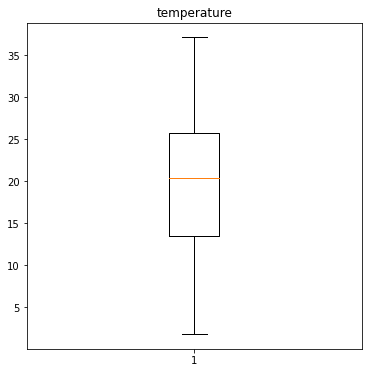

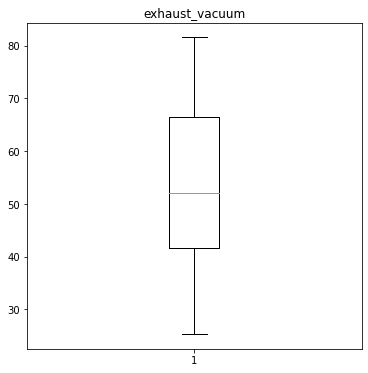

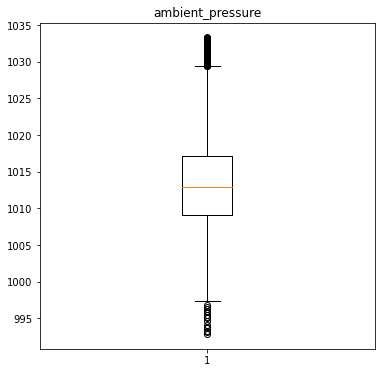

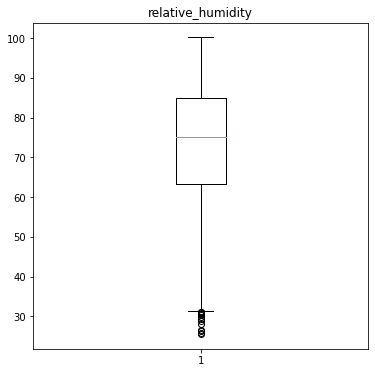

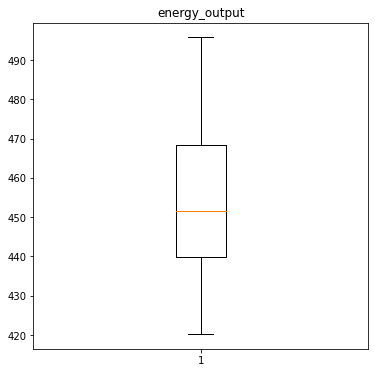

In [15]:
## Creating a box/whisker plot to check the outliers in the dataset

for i in l1:
    plt.figure(figsize=(6,6))
    plt.boxplot(x=i,data=df)
    plt.title(i)
    plt.show()

###### Above we can se that the two variable has outliers, hence we need to check that will these extreme values impact the biasness of  our dataaset.

### Treating the outliers

With the above analysis we can see that 'relative_humidity' and 'ambient_pressure' have outliers which might distort are results because in the presence of outliers the standard daviation and mean will get affected and can cause biasness in the data, so it is necessary to treat the outliers and remove them 

In [16]:
# Calculation of inter quartile range to calculate upper and lower bound.

for i in df:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    IQR=q3-q1
    
    lower_bound=round(q1-1.5*IQR,3)
    upper_bound=round(q3+1.5*IQR,3)
    
    a=df[(df[i]<lower_bound)|(df[i]>upper_bound)]
    
    print(f"The lower bound for {i} is: {lower_bound}")
    print(f"The upper bound for {i} is: {upper_bound}")
    print(f' No. of outliers in {i} is: {len(a)}')
    print("\n")
    
    

The lower bound for temperature is: -4.74
The upper bound for temperature is: 43.98
 No. of outliers in temperature is: 0


The lower bound for exhaust_vacuum is: 4.585
The upper bound for exhaust_vacuum is: 103.665
 No. of outliers in exhaust_vacuum is: 0


The lower bound for ambient_pressure is: 996.912
The upper bound for ambient_pressure is: 1029.372
 No. of outliers in ambient_pressure is: 91


The lower bound for relative_humidity is: 31.163
The upper bound for relative_humidity is: 117.062
 No. of outliers in relative_humidity is: 13


The lower bound for energy_output is: 396.828
The upper bound for energy_output is: 511.288
 No. of outliers in energy_output is: 0




From the above calculation it is confirm that there are certain values that are out of bound, hence dropping the values form the dataset below.

In [17]:
df.drop(df[(df.relative_humidity<31.163) | (df['relative_humidity']>117.062)].index, inplace=True)


In [18]:
df.drop(df[(df.ambient_pressure<996.912) | (df['ambient_pressure']>1029.372)].index, inplace=True)

In [19]:
df.shape

(9423, 5)

So we identified the outliers and drop them from the dataset.

### Sliptting the data 

In [20]:
#First we will seperate the dependent and independent variables.

x=df.drop(["energy_output"],axis=1)
y=df["energy_output"]

In [21]:
#Now,splitting the data into train and test through sklearn library
from sklearn.model_selection import train_test_split


xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.80)

checking the shape of the splitted train and test dataset

In [22]:
print(xtrain.shape)
print(ytrain.shape)

(7538, 4)
(7538,)


In [23]:
print(xtest.shape)
print(ytest.shape)

(1885, 4)
(1885,)


#### Developing the model to make prediction.

In [24]:
#Using linear Regression to develop the model

from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression() #Using an object to call the linear regression class.

In [26]:
# Passing the x,y train data into the model

model.fit(xtrain,ytrain)

LinearRegression()

In [27]:
#As we the formula to calculate linear regression in y=mx+c

# Below finding out the 'c' value

model.intercept_

451.9438880331637

In [28]:
# Finding the value of "mx" for all the variables

model.coef_

array([-1.98691101, -0.22728078,  0.0645142 , -0.15761762])

##### Making Prediction

In [29]:
ypred=model.predict(xtest)

ypred

array([478.06226613, 429.67458105, 469.82537245, ..., 464.53986776,
       474.78392589, 464.64951663])

##### Checking the accuracy of the model

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score

In [31]:
#Using absolute error to check for the error in the developed model

print(mean_absolute_error(ytest,ypred))

3.675656080643974


In [32]:
# Using r2_score to check the accuracy score of the model.

print(r2_score(ytest,ypred))

0.926822661798564


From the above developed model and checking the acccuracy score we can se that the predictions accuracy is above 90%

Text(0.5, 1.0, 'Observed vs. Predicted Values')

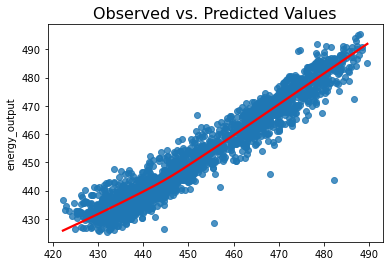

In [33]:
sns.regplot(x=ypred, y=ytest, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)